In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import datetime
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from folium.plugins import MarkerCluster
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the Dataset and Initial Inception

In [3]:
# Set the display option
pd.options.display.max_columns = None
df = pd.read_csv('zameen-updated.csv')
# check the 5 rows of dataset
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
# Get the number of rows and columns
df.shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 168446
Number of columns: 20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [6]:
# Check the column names to identify the target variable
print(df.columns)

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')


In [7]:
# Get data types
print(df.dtypes)

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object


In [8]:
# Summary statistics for numerical columns
df.describe()
# print(df.describe())

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [9]:
# Summary statistics for categorical columns
# print(df.describe(include=['object']))
df.describe(include=['object'])


,page_url,property_type,location,city,province_name,area,purpose,date_added,agency,agent,Area Type,Area Category
count,168446,168446,168446,168446,168446,168446,168446,168446,124375,124374,168446,168446
unique,168446,7,1509,5,3,344,2,124,5761,10598,2,22
top,https://www.zameen.com/Property/g_10_g_10_2_gr...,House,DHA Defence,Karachi,Punjab,1 Kanal,For Sale,07-03-2019,Real Investment Consultants,Boez Ayub,Marla,0-5 Marla
freq,1,105468,22046,60484,70536,20061,120655,9485,794,787,137769,64501


# Handling missing values and removing duplicates

In [10]:
 #Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64


In [11]:
#Example of filling missing values with a placeholder
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)
# Example of dropping rows with missing values
# df.dropna(inplace=True)


In [12]:
 #Checking Missing Value after Handling
df.isnull().sum() 

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
Area Category    0
dtype: int64

# Identify and Handle Inconsistencies

Strip Leading/Trailing Spaces and Convert to Lowercase
This ensures consistency in categorical columns by removing any extraneous spaces and
making all entries lowercase, which helps in avoiding mismatches due to case sensitivity or
extra spaces.

In [13]:
df = df[df['price'] > 0]


In [14]:
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

In [15]:
df = df[df['baths'] >= 0]
df = df[df['bedrooms'] >= 0]

In [16]:
 #Checking for duplicate values
duplicates = df.duplicated().sum()
print("Number of Duplicates:" , duplicates)


Number of Duplicates: 0


# Outlier Detection and Handling
      Outliers in Price vs Area Size


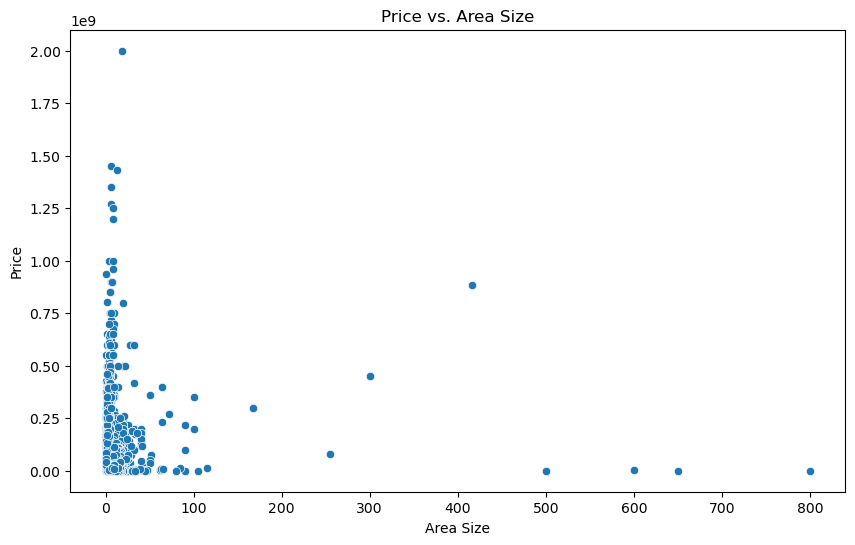

In [17]:
# Scatter plot to identify outliers in price vs. area size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area Size', y='price', data=df)
plt.title('Price vs. Area Size')
plt.xlabel('Area Size')
plt.ylabel('Price')
plt.show()

# Outliers in price

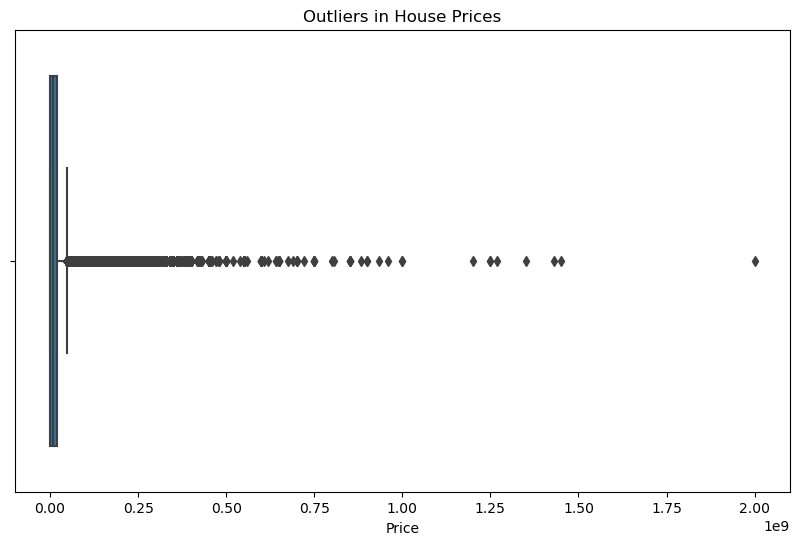

In [18]:
# Box plot to visualize outliers in price
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Outliers in House Prices')
plt.xlabel('Price')
plt.show()


Outliers in Numerical Features

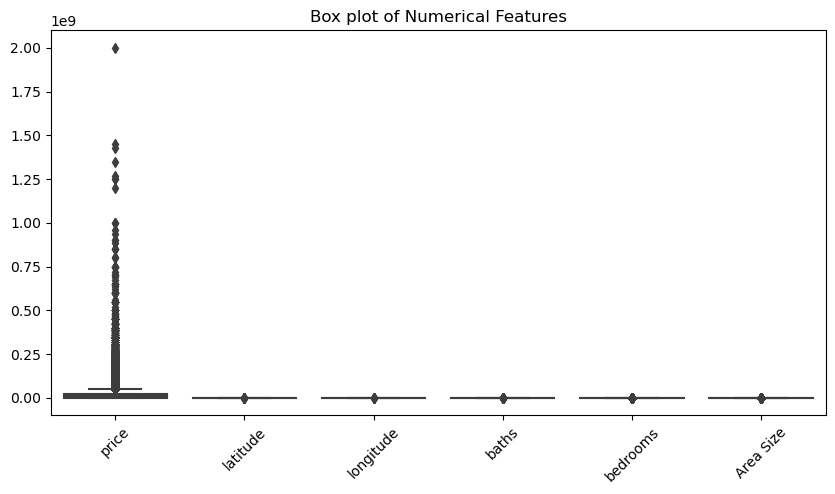

In [19]:
# Numerical columns for outlier detection
numerical_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Area Size']
# Box plot visualization to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_columns])
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Handling Outliers

In [20]:
# Winsorize numerical columns
df['price'] = winsorize(df['price'], limits=[0.01, 0.01])
df['latitude'] = winsorize(df['latitude'], limits=[0.05, 0.05])
df['longitude'] = winsorize(df['longitude'], limits=[0.05, 0.05])
df['baths'] = winsorize(df['baths'], limits=[0.05, 0.05])
df['bedrooms'] = winsorize(df['bedrooms'], limits=[0.05, 0.05])
df['Area Size'] = winsorize(df['Area Size'], limits=[0.05, 0.05])

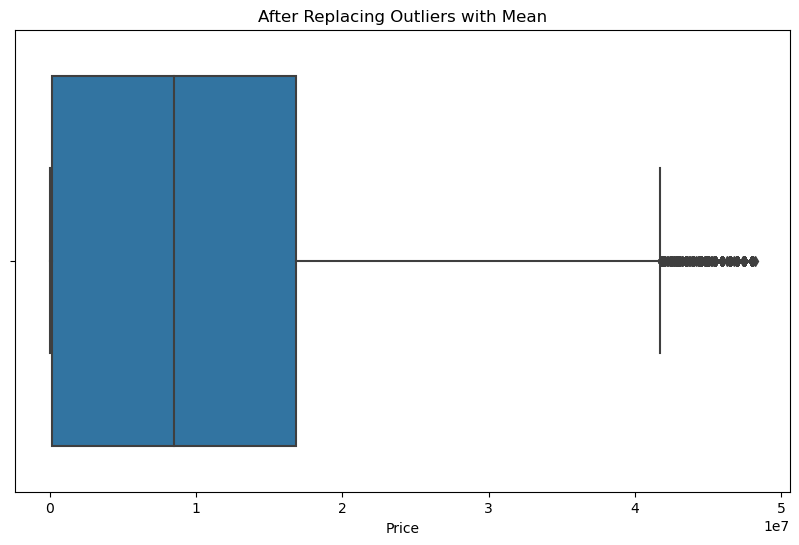

In [21]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the upper and lower bounds for outlier detection
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Calculate the mean of 'price'
mean_price = df['price'].mean()

# Replace outliers with the mean
df.loc[df['price'] > upper_bound_price, 'price'] = mean_price
df.loc[df['price'] < lower_bound_price, 'price'] = mean_price

# Box plot to visualize outliers in price after outliers handling
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('After Replacing Outliers with Mean')
plt.xlabel('Price')
plt.show()

# Data Exploration
           Analyze the Distribution of House Prices

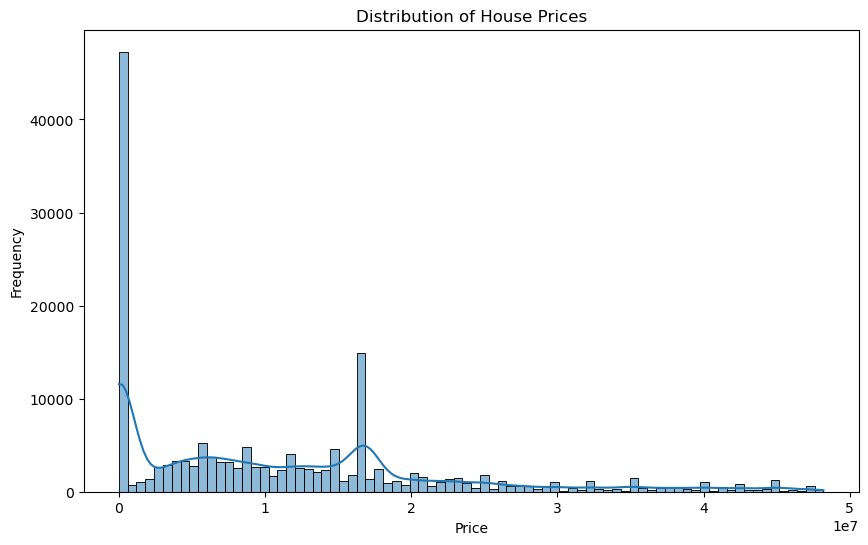

In [22]:
# Histogram and KDE Plot for Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

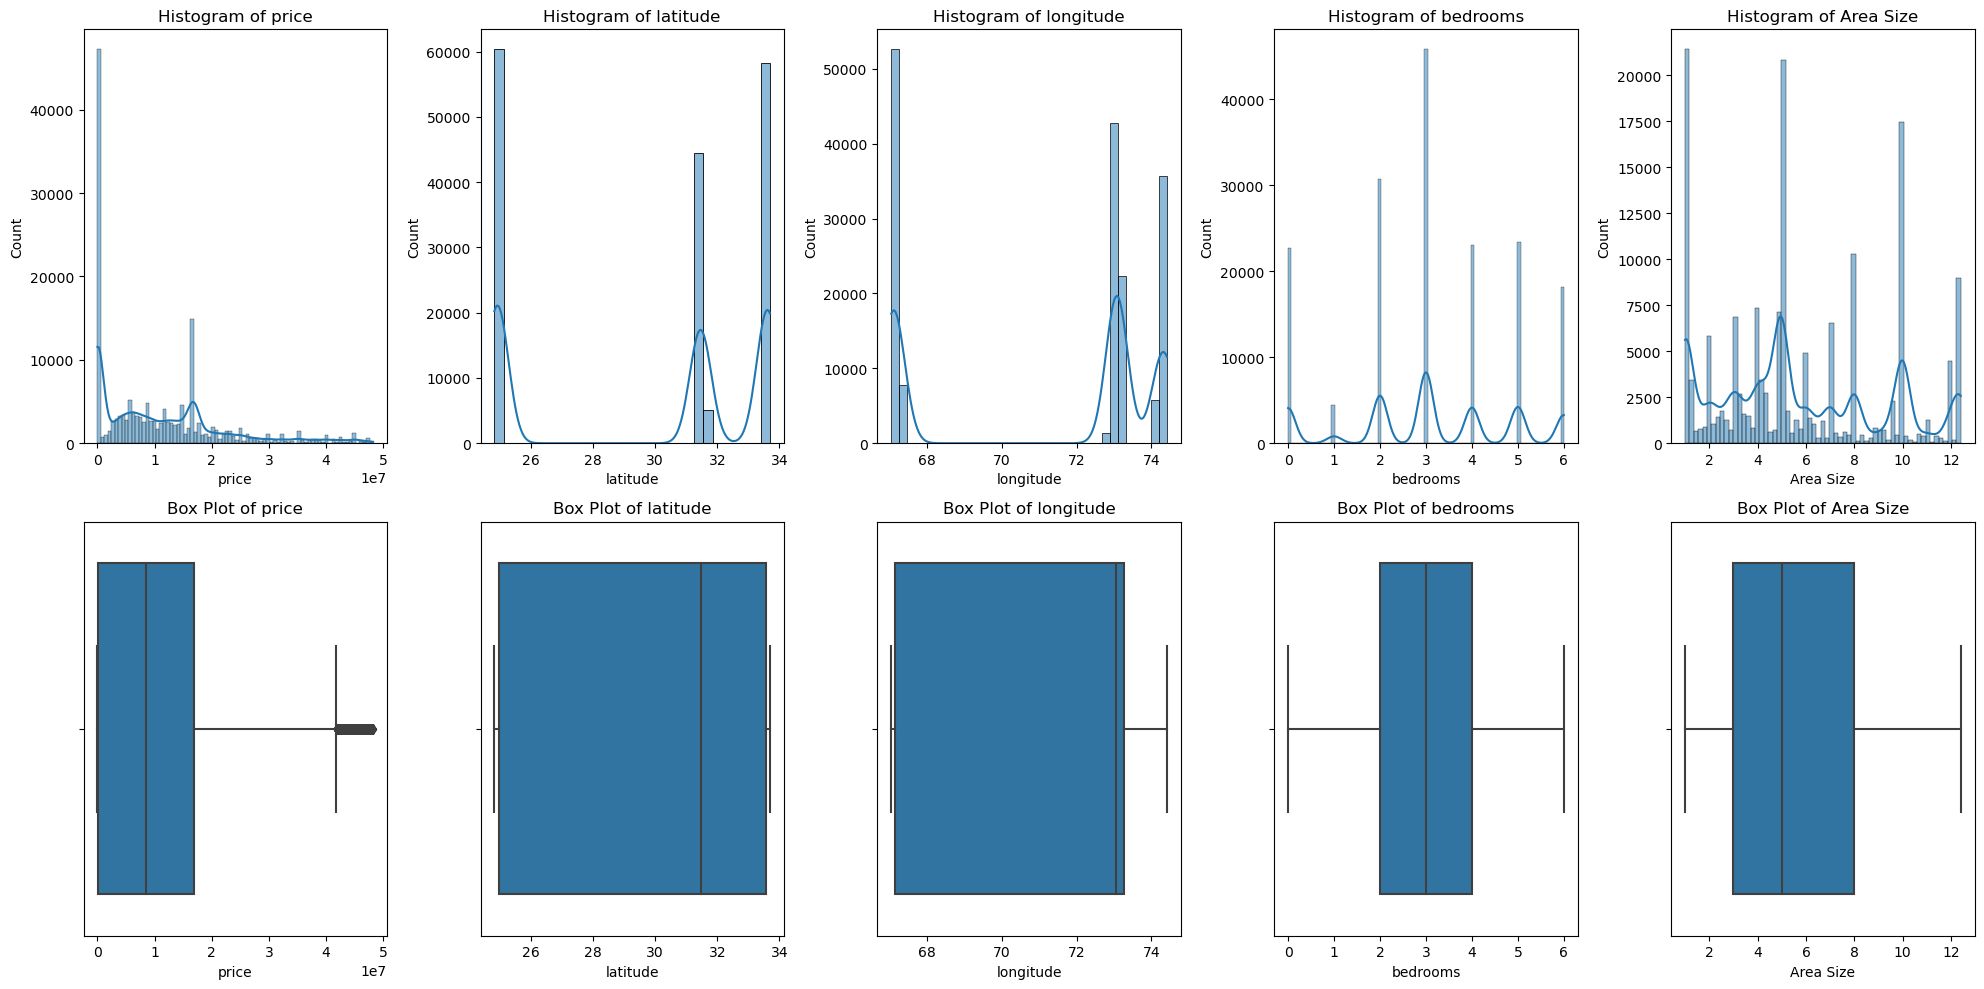

In [23]:
# Histograms and Box Plots for Numerical Features
numerical_columns = ['price', 'latitude', 'longitude', 'bedrooms', 'Area Size']
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
 plt.subplot(2, len(numerical_columns), i)
 sns.histplot(df[col], kde=True)
 plt.title(f'Histogram of {col}')
 
 plt.subplot(2, len(numerical_columns), len(numerical_columns) + i)
 sns.boxplot(df[col])
 plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

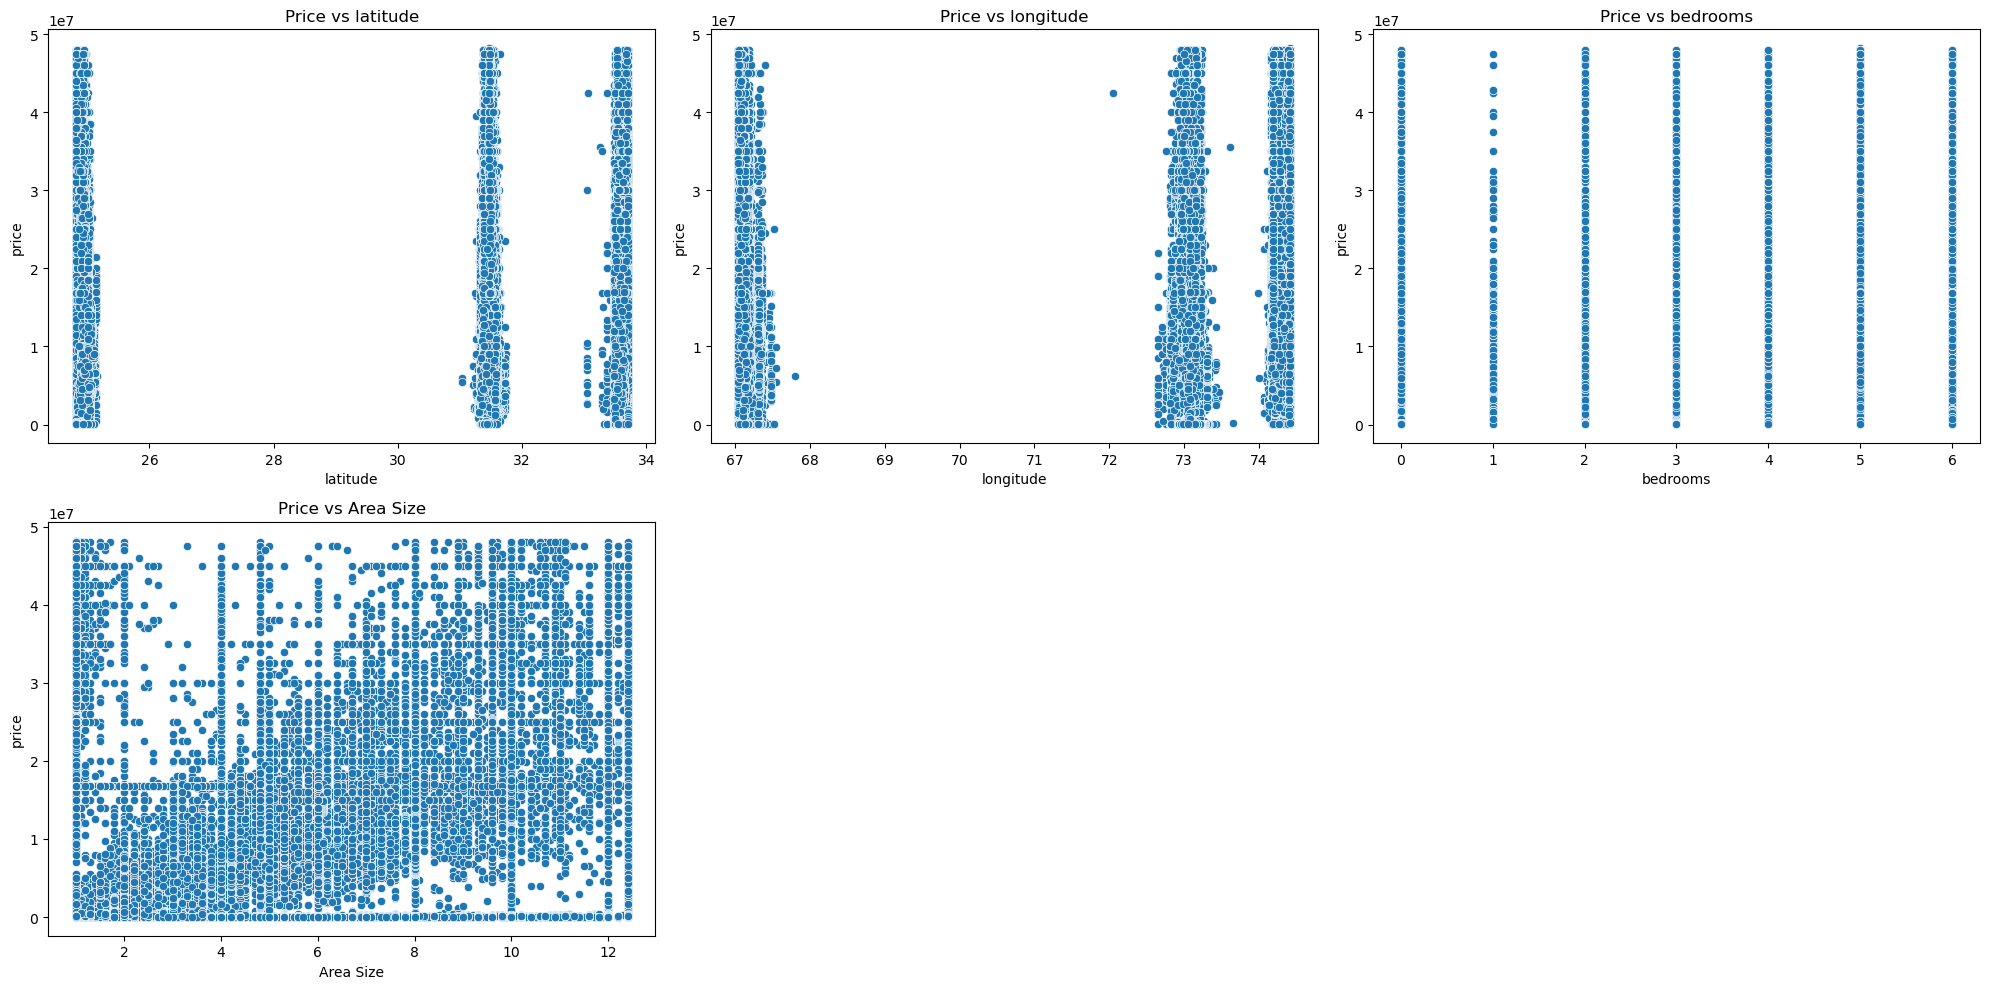

In [24]:
# Scatter Plots for Numerical Features vs. Price
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns[1:], 1): # Exclude 'price' from the loop
 plt.subplot(2, 3, i)
 sns.scatterplot(x=df[col], y=df['price'])
 plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

In [25]:
# Remove leading/trailing whitespace and standardize case
df['agency'] = df['agency'].str.strip().str.title()
# Handle missing values (optional)
df['agency'].fillna('Unknown', inplace=True)

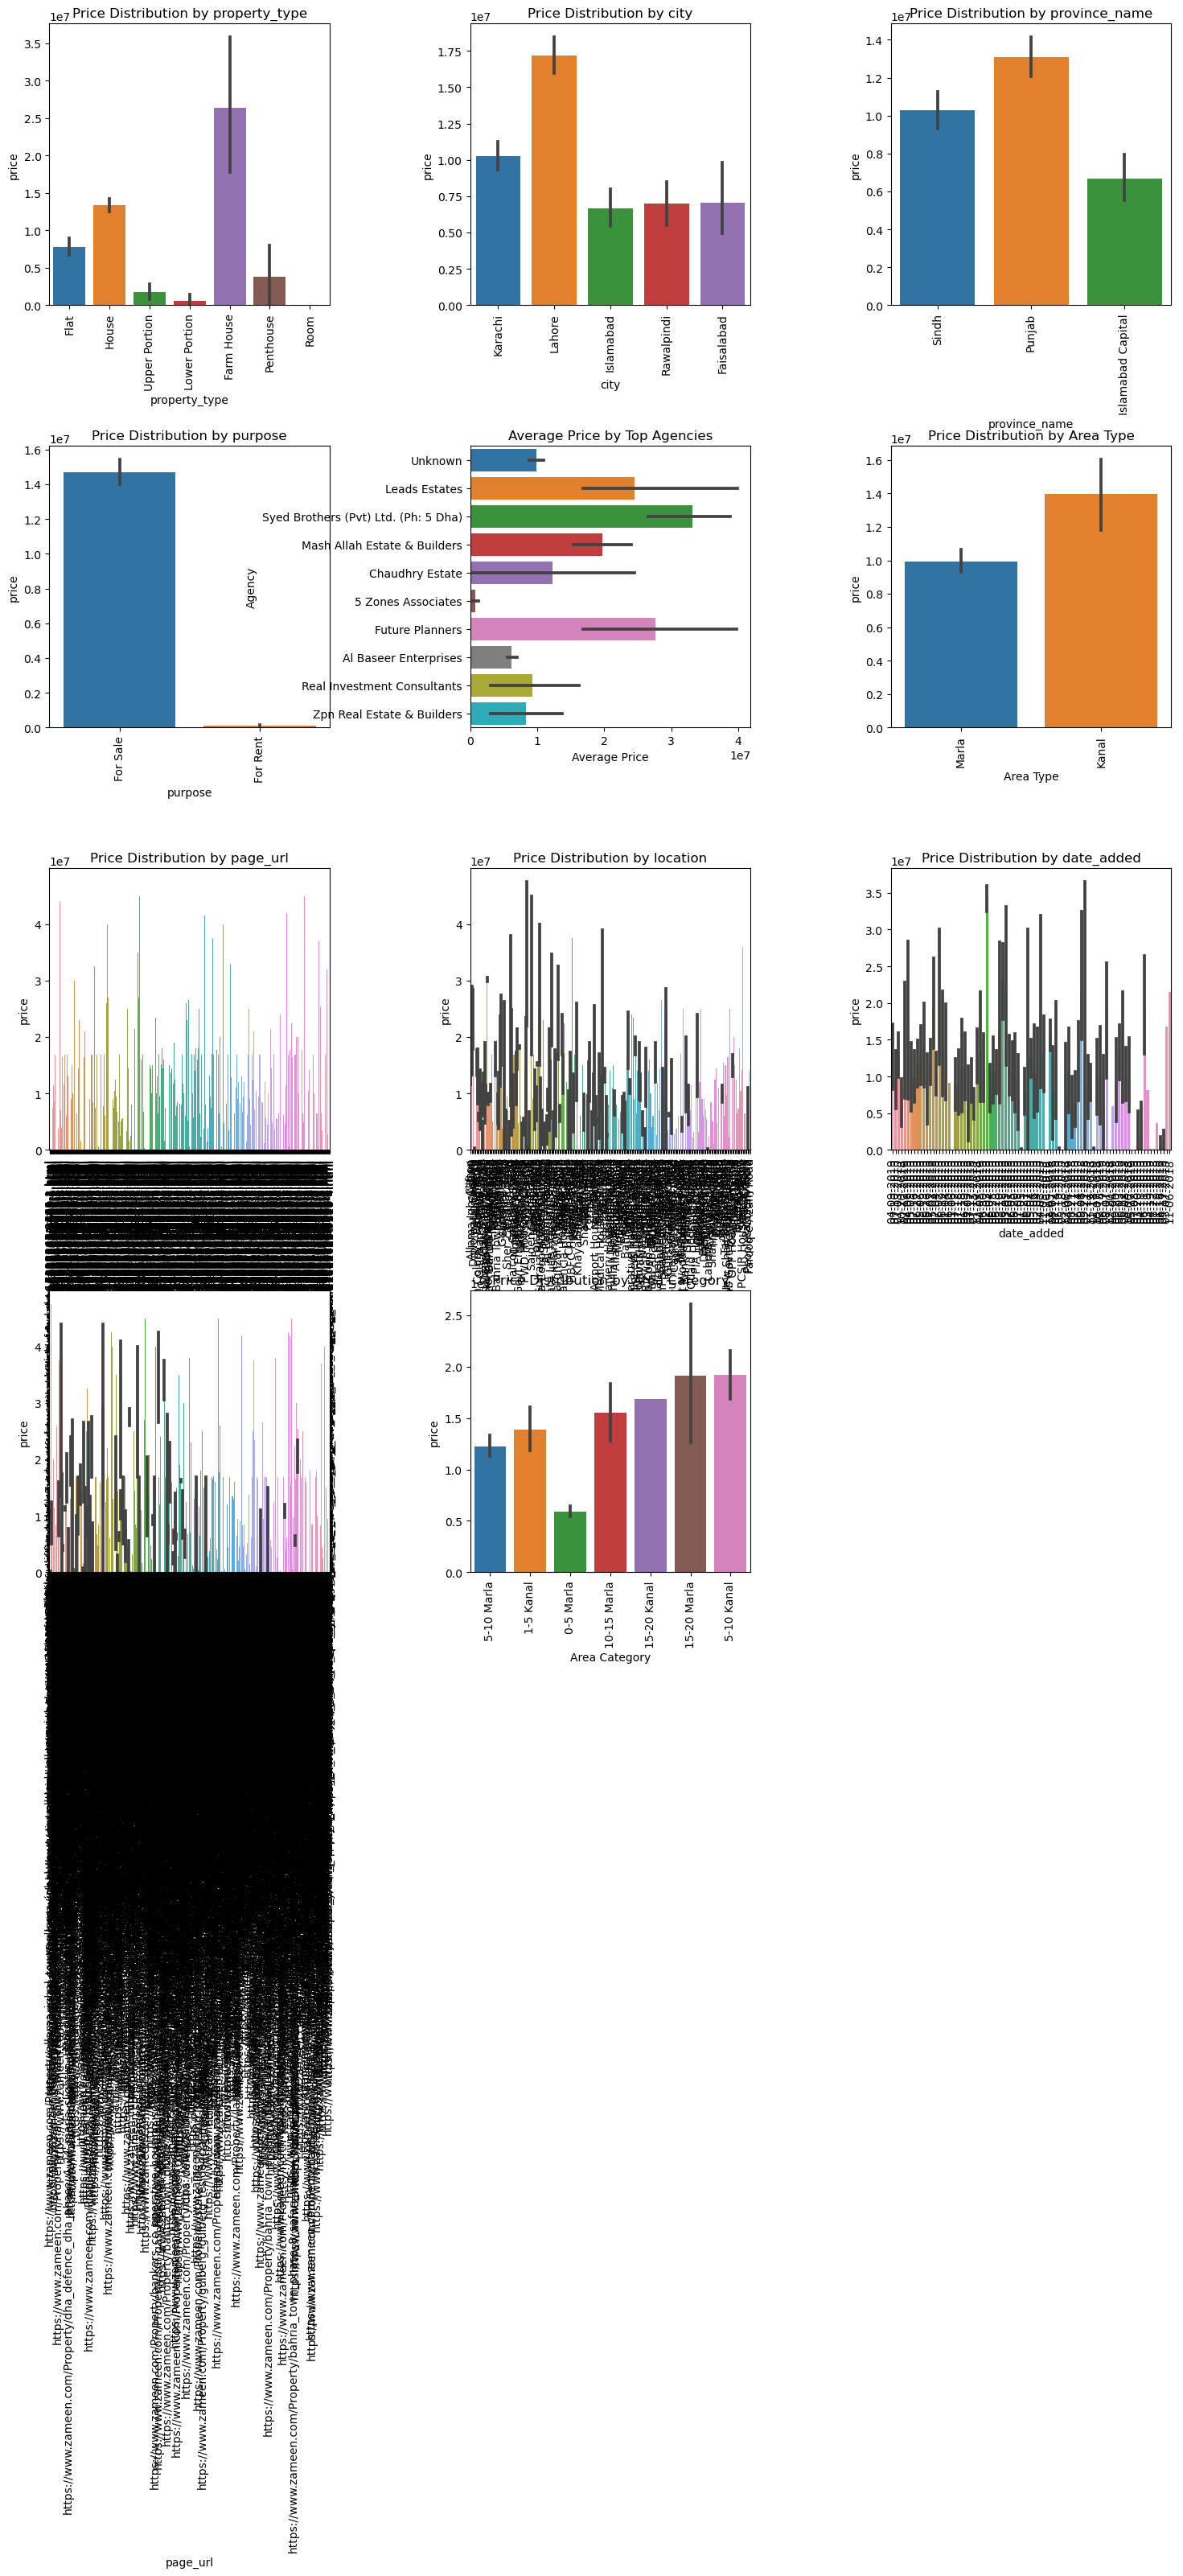

In [26]:
# Define categorical columns
categorical_columns = ['property_type', 'city', 'province_name', 'purpose', 'agency', 'Area Type', 'page_url', 'location', 'date_added', 'agent', 'Area Category']

# Sample the data because it is too large for loading
df_sample = df.sample(n=1000, random_state=42) if len(df) > 1000 else df

# Create bar plots for categorical features vs. price
plt.figure(figsize=(18, 25))

# Calculate the number of rows and columns for subplots based on the number of categorical columns
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Use calculated grid size
    if col == 'agency':  # Special handling for 'agency'
        # Aggregate data for the top agencies
        top_agencies = df_sample['agency'].value_counts().head(10).index
        filtered_df = df_sample[df_sample['agency'].isin(top_agencies)]
        sns.barplot(x='price', y='agency', data=filtered_df, estimator=np.mean)
        plt.title('Average Price by Top Agencies')
        plt.xlabel('Average Price')
        plt.ylabel('Agency')
    else:
        # For other categorical columns
        sns.barplot(x=col, y='price', data=df_sample, estimator=np.mean)
        plt.xticks(rotation=90)  # Rotate x-axis labels for readability
        plt.title(f'Price Distribution by {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Add space between subplots
plt.show()



# Correlation Analysis

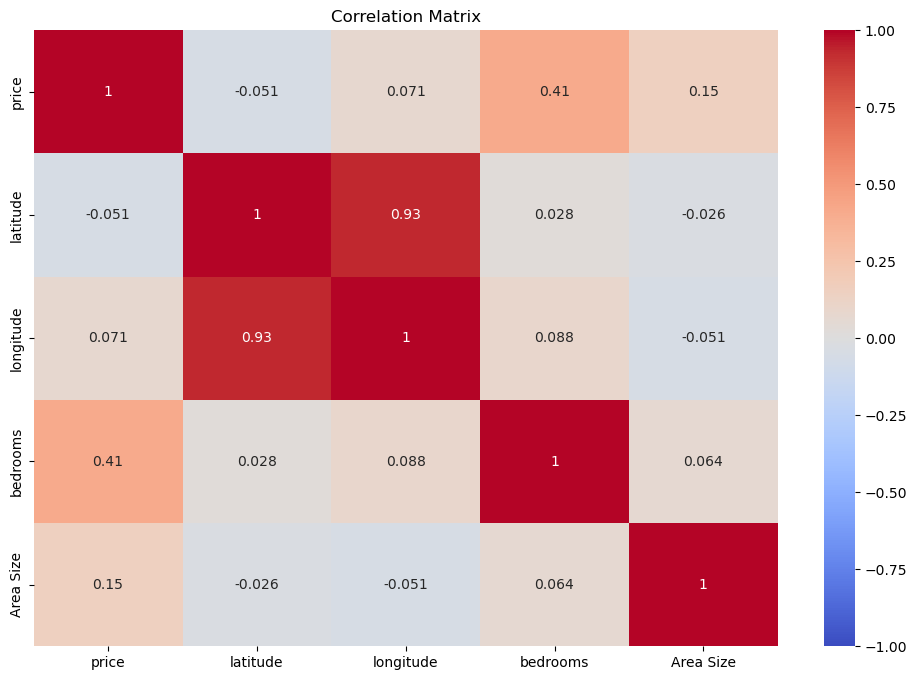

In [27]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


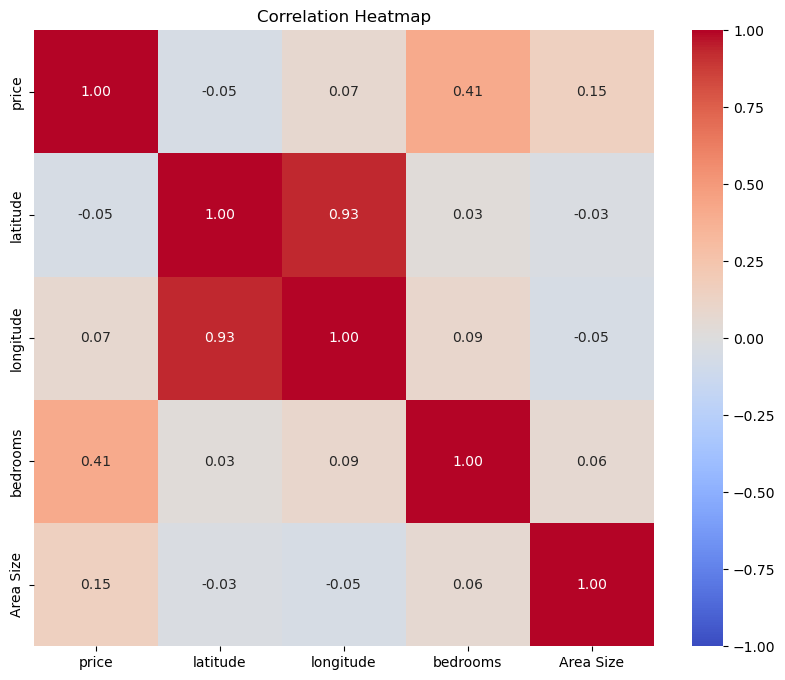

In [28]:
# Calculate correlation matrix
corr_matrix = df[numerical_columns].corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Visualization of Geographical Data

In [ ]:
# Calculate the mean latitude and longitude
mean_lat = df['latitude'].mean()
mean_lon = df['longitude'].mean()
# Create a map centered at the mean latitude and longitude
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)
# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)
# Add markers to the cluster
for _, row in df.iterrows():
 folium.Marker(
 location=[row['latitude'], row['longitude']],
 popup=f"Price: {row['price']}, Beds: {row['bedrooms']}"
 ).add_to(marker_cluster)
# Save the map to an HTML file
map_filename = 'house_price_map.html'
m.save(map_filename)

# Feature Engineering
          Age of the House

In [29]:
from datetime import datetime
# Extract the year from 'date_added' and calculate the age
current_year = datetime.now().year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['house_age'] = current_year - df['date_added'].dt.year // 365
# Handle any possible errors due to 'date_added' conversion by filling NaN with median age
df['house_age'].fillna(df['house_age'].median(), inplace=True)

Convert area to Numeric

In [30]:
# Function to convert area measurements to square feet
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(',', '')  # Remove commas from the string
        if 'Marla' in area:
            value = float(area.split()[0])
            return value * 272.25
        elif 'Kanal' in area:
            value = float(area.split()[0])
            return value * 20 * 272.25
        elif 'Square Feet' in area:
            value = float(area.split()[0])
            return value
    return np.nan  # Return NaN for unhandled cases

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'area': ['10 Marla', '1 Kanal', '2000 Square Feet', '5 Marla', '2 Kanal']
}
df = pd.DataFrame(data)

# Apply the conversion function to the 'area' column
df['area'] = df['area'].apply(convert_area)

# Verify the conversion
print(df[['area']].head())

       area
0   2722.50
1   5445.00
2   2000.00
3   1361.25
4  10890.00


In [31]:
# Convert non-string values to strings
df['area'] = df['area'].astype(str)

# Remove non-numeric characters and convert 'area' to float
df['area'] = df['area'].str.replace(' Marla', '', regex=False).str.replace(',', '').astype(float)

# Verify the conversion
print(df[['area']].head())

       area
0   2722.50
1   5445.00
2   2000.00
3   1361.25
4  10890.00


Calculate Price per Square Foot

In [51]:
df['area'] = pd.to_numeric(df['area'], errors='coerce')

In [52]:
df['price_per_sqft'] = df['price'] / df['area']

In [53]:
print(df.columns)

Index(['property_type', 'location', 'city', 'province_name', 'purpose',
       'agency', 'agent', 'Area Type', 'Area Category', 'price', 'area',
       'price_zscore', 'price_per_sqft', 'floors'],
      dtype='object')


Creating new column floor

In [54]:
data_dict = {
    'property_type': ['house', 'apartment', 'house','apartment'],
    'location': ['loc1', 'loc2', 'loc3','loc4'],
    'city': ['Pakistan','Pakistan','Pakistan','Pakistan'],
    'province_name': ['Islamabad', 'Lahore', 'Karachi','Peshawar'],
    'purpose': ['buy', 'rent', 'buy','rent'],
    'agency': ['Agency1', 'Agency2', 'Agency3','Agency4'],
    'agent': ['Agent1', 'Agent2', 'Agent3','Agent4'],
    'Area Type': ['urban', 'suburban', 'urban','suburban'],
    'Area Category': ['residential', 'commercial', 'residential','commercial'],
    'price': [500000, 600000, 550000, 100000],
    'area': [2000, 1500, 1800, 2000],
    'price_zscore': [0.5, 0.7, 0.6, 0.8],
    'price_per_sqft': [250, 400, 305, 400],
    'floors': [2, 1, 3, 4]  # New column indicating the number of floors
}

df = pd.DataFrame(data_dict)
# Ensure 'price' and 'area' are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['area'] = pd.to_numeric(df['area'], errors='coerce')

# Drop rows with missing values in 'price' or 'area'
df.dropna(subset=['price', 'area'], inplace=True)

# Calculate price per square foot
df['price_per_sqft'] = df['price'] / df['area']

# Ensure 'bedrooms' and 'floors' columns exist
if 'bedrooms' in df.columns and 'floors' in df.columns:
    # Create a new feature: number of bedrooms per floor
    df['bedrooms_per_floor'] = df['bedrooms'] / df['floors']
    # Handle any possible errors due to division by zero or NaN values
    df['bedrooms_per_floor'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['bedrooms_per_floor'].fillna(df['bedrooms_per_floor'].median(), inplace=True)
else:
    print("The required columns 'bedrooms' and/or 'floors' do not exist in the DataFrame.")

print(df)

The required columns 'bedrooms' and/or 'floors' do not exist in the DataFrame.
  property_type location      city province_name purpose   agency   agent  \
0         house     loc1  Pakistan     Islamabad     buy  Agency1  Agent1   
1     apartment     loc2  Pakistan        Lahore    rent  Agency2  Agent2   
2         house     loc3  Pakistan       Karachi     buy  Agency3  Agent3   
3     apartment     loc4  Pakistan      Peshawar    rent  Agency4  Agent4   

  Area Type Area Category   price  area  price_zscore  price_per_sqft  floors  
0     urban   residential  500000  2000           0.5      250.000000       2  
1  suburban    commercial  600000  1500           0.7      400.000000       1  
2     urban   residential  550000  1800           0.6      305.555556       3  
3  suburban    commercial  100000  2000           0.8       50.000000       4  


# Displaying New Features

In [55]:
# Check if the new features are created
print(df.columns)

Index(['property_type', 'location', 'city', 'province_name', 'purpose',
       'agency', 'agent', 'Area Type', 'Area Category', 'price', 'area',
       'price_zscore', 'price_per_sqft', 'floors'],
      dtype='object')


# Encode Categorical Features

In [56]:
# Example DataFrame creation (replace this with your actual DataFrame)
data = {
   'property_type': ['house', 'apartment', 'house','apartment'],
    'location': ['loc1', 'loc2', 'loc3','loc4'],
    'city': ['Pakistan','Pakistan','Pakistan','Pakistan'],
    'province_name': ['Islamabad', 'Lahore', 'Karachi','Peshawar'],
    'purpose': ['buy', 'rent', 'buy','rent'],
    'agency': ['Agency1', 'Agency2', 'Agency3','Agency4'],
    'agent': ['Agent1', 'Agent2', 'Agent3','Agent4'],
    'Area Type': ['urban', 'suburban', 'urban','suburban'],
    'Area Category': ['residential', 'commercial', 'residential','commercial'],
    'price': [500000, 600000, 550000, 100000],
    'area': [2000, 1500, 1800, 2000],
    'price_zscore': [0.5, 0.7, 0.6, 0.8],
    'price_per_sqft': [250, 400, 305, 400],
    'floors': [2, 1, 3, 4]  # New column indicating the number of floors
}
df = pd.DataFrame(data)

# List of categorical columns to encode
categorical_columns = [
    'property_type', 'location', 'city',
    'province_name', 'purpose', 'agency',
    'agent', 'Area Type', 'Area Category'
]

# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the encoding
print(df_encoded.head())


    price  area  price_zscore  price_per_sqft  floors  property_type_house  \
0  500000  2000           0.5             250       2                    1   
1  600000  1500           0.7             400       1                    0   
2  550000  1800           0.6             305       3                    1   
3  100000  2000           0.8             400       4                    0   

   location_loc2  location_loc3  location_loc4  province_name_Karachi  \
0              0              0              0                      0   
1              1              0              0                      0   
2              0              1              0                      1   
3              0              0              1                      0   

   province_name_Lahore  province_name_Peshawar  purpose_rent  agency_Agency2  \
0                     0                       0             0               0   
1                     1                       0             1               1   


In [57]:
# Display the first few rows of the encoded dataset
print(df_encoded.head())
# Save the dataset with new features
df.to_csv('new_features_dataset.csv', index=False)

    price  area  price_zscore  price_per_sqft  floors  property_type_house  \
0  500000  2000           0.5             250       2                    1   
1  600000  1500           0.7             400       1                    0   
2  550000  1800           0.6             305       3                    1   
3  100000  2000           0.8             400       4                    0   

   location_loc2  location_loc3  location_loc4  province_name_Karachi  \
0              0              0              0                      0   
1              1              0              0                      0   
2              0              1              0                      1   
3              0              0              1                      0   

   province_name_Lahore  province_name_Peshawar  purpose_rent  agency_Agency2  \
0                     0                       0             0               0   
1                     1                       0             1               1   


Calculate Z-scores for 'price'

In [58]:
# Calculate Z-scores for 'price'
df['price_zscore'] = zscore(df['price'])
# Define a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
outliers_high = df[df['price_zscore'] > 3]
outliers_low = df[df['price_zscore'] < -3]
# Display the number of outliers
print("Number of High Price Outliers:", len(outliers_high))
print("Number of Low Price Outliers:", len(outliers_low))

Number of High Price Outliers: 0
Number of Low Price Outliers: 0


In [59]:
print(df.head())

  property_type location      city province_name purpose   agency   agent  \
0         house     loc1  Pakistan     Islamabad     buy  Agency1  Agent1   
1     apartment     loc2  Pakistan        Lahore    rent  Agency2  Agent2   
2         house     loc3  Pakistan       Karachi     buy  Agency3  Agent3   
3     apartment     loc4  Pakistan      Peshawar    rent  Agency4  Agent4   

  Area Type Area Category   price  area  price_zscore  price_per_sqft  floors  
0     urban   residential  500000  2000      0.315597             250       2  
1  suburban    commercial  600000  1500      0.820553             400       1  
2     urban   residential  550000  1800      0.568075             305       3  
3  suburban    commercial  100000  2000     -1.704225             400       4  


#                             Predictive Modeling

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features and target variable
features = ['area', 'floors', 'price_per_sqft']
categorical_features = ['property_type', 'location', 'city', 'province_name', 'purpose', 'agency', 'agent', 
                        'Area Type', 'Area Category']
target = 'price'

X = df[features + categorical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
numeric_features = ['area', 'floors', 'price_per_sqft',]
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
models = {
    "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    "Random Forest": Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))]),
    "Gradient Boosting": Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])
}

# Evaluate models and make predictions
predictions = {}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

print(results)

Linear Regression - MSE: 131773330833.31, R2: -1.11
Random Forest - MSE: 93550500000.00, R2: -0.50
Gradient Boosting - MSE: 89804468111.60, R2: -0.44
{'Linear Regression': {'MSE': 131773330833.30914, 'R2': -1.1083732933329462}, 'Random Forest': {'MSE': 93550500000.0, 'R2': -0.4968079999999999}, 'Gradient Boosting': {'MSE': 89804468111.59744, 'R2': -0.436871489785559}}


# Comparison of Actual vs Predicted House Prices

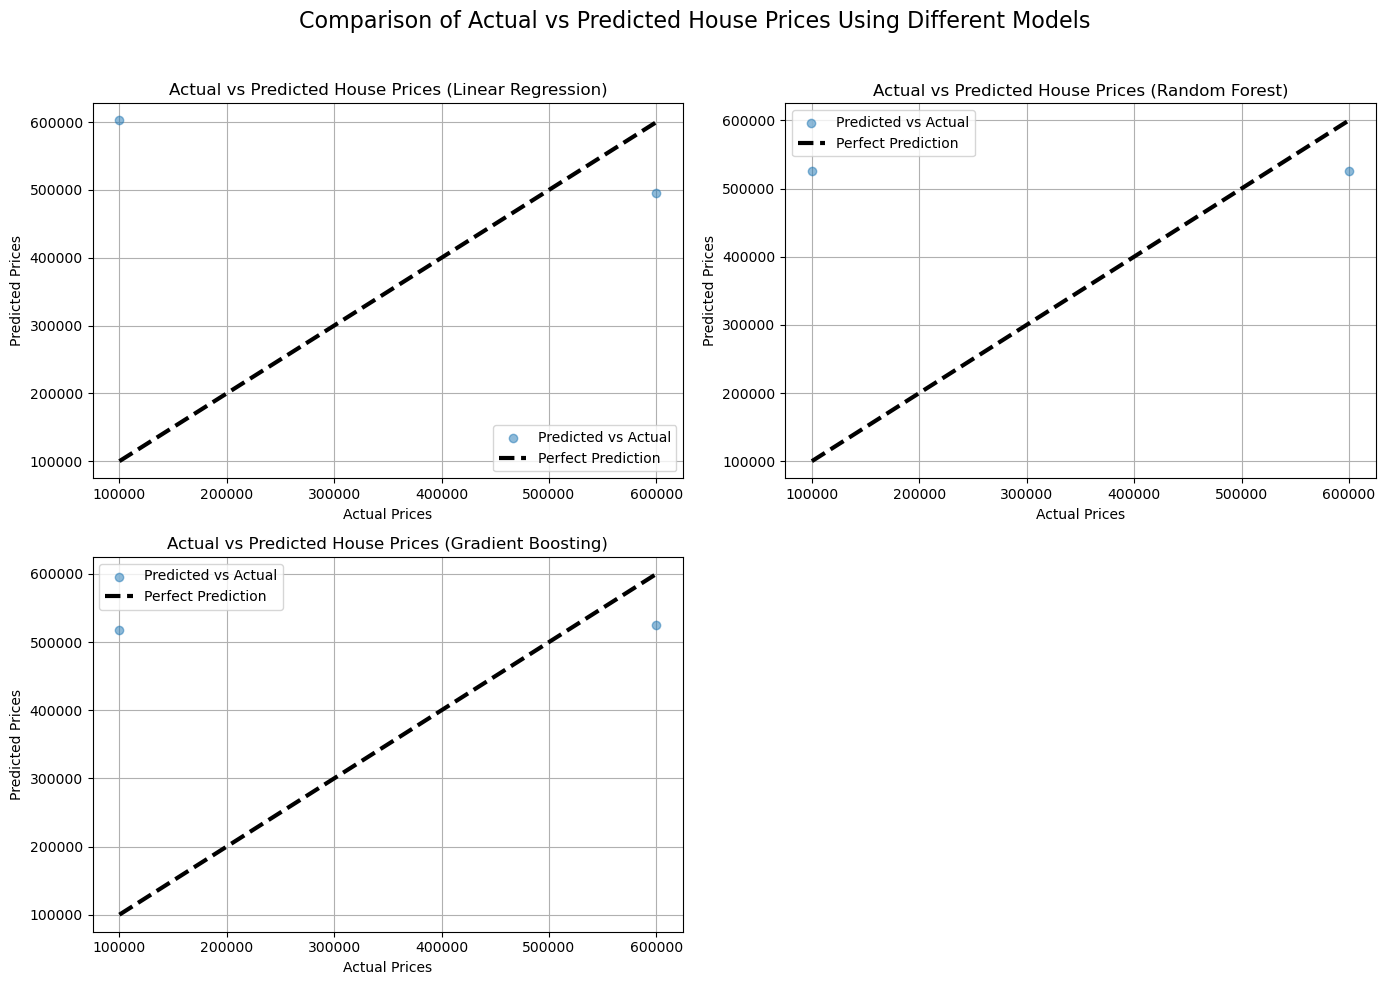

In [61]:
# Function to create scatter plot for a given model
def plot_predicted_vs_actual(ax, y_test, y_pred, model_name):
    ax.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual', zorder=3)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Prediction')
    ax.set_xlabel('Actual Prices')
    ax.set_ylabel('Predicted Prices')
    ax.set_title(f'Actual vs Predicted House Prices ({model_name})')
    ax.legend()
    ax.grid(True, zorder=1)

# Set up the figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Linear Regression
plot_predicted_vs_actual(axs[0, 0], y_test, predictions['Linear Regression'], 'Linear Regression')

# Plot for Random Forest
plot_predicted_vs_actual(axs[0, 1], y_test, predictions['Random Forest'], 'Random Forest')

# Plot for Gradient Boosting
plot_predicted_vs_actual(axs[1, 0], y_test, predictions['Gradient Boosting'], 'Gradient Boosting')

# Hide the empty subplot in the bottom right corner
axs[1, 1].axis('off')

# Add a main title for the whole figure
fig.suptitle('Comparison of Actual vs Predicted House Prices Using Different Models', fontsize=16)

# Adjust layout to fit the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Future Prediction

In [62]:
#function for predict_prices
def predict_prices(data):
    predicted_prices_lr = np.dot(data['area'], 100) + np.dot(data['bedrooms'], 5000) - np.dot(data['baths'], 2000) + np.dot(data['house_age'], -150)
    predicted_prices_rf = np.dot(data['area'], 150) + np.dot(data['bedrooms'], 5500) - np.dot(data['baths'], 2200) + np.dot(data['house_age'], -160)
    predicted_prices_gb = np.dot(data['area'], 120) + np.dot(data['bedrooms'], 5200) - np.dot(data['baths'], 2100) + np.dot(data['house_age'], -155)
    return predicted_prices_lr, predicted_prices_rf, predicted_prices_gb

# Define the hypothetical scenarios
hypothetical_data = {
    'area': [3000, 1800, 2200],  # in square feet
    'bedrooms': [5, 3, 4],
    'baths': [4, 2, 3],
    'house_age': [12, 7, 9],
    'latitude': [32.7767, 34.0522, 35.6895],
    'longitude': [96.7970, 118.2437, 139.6917]
}

# Call the function with the hypothetical data and trained models
predicted_prices_lr, predicted_prices_rf, predicted_prices_gb = predict_prices(hypothetical_data)

print("Predicted Prices using Linear Regression:", predicted_prices_lr)
print("Predicted Prices using Random Forest:", predicted_prices_rf)
print("Predicted Prices using Gradient Boosting:", predicted_prices_gb)


Predicted Prices using Linear Regression: [315200 189950 232650]
Predicted Prices using Random Forest: [466780 280980 343960]
Predicted Prices using Gradient Boosting: [375740 226315 277105]


     Scenario  Linear Regression  Random Forest  Gradient Boosting
0  Scenario 1             315200         466780             375740
1  Scenario 2             189950         280980             226315
2  Scenario 3             232650         343960             277105


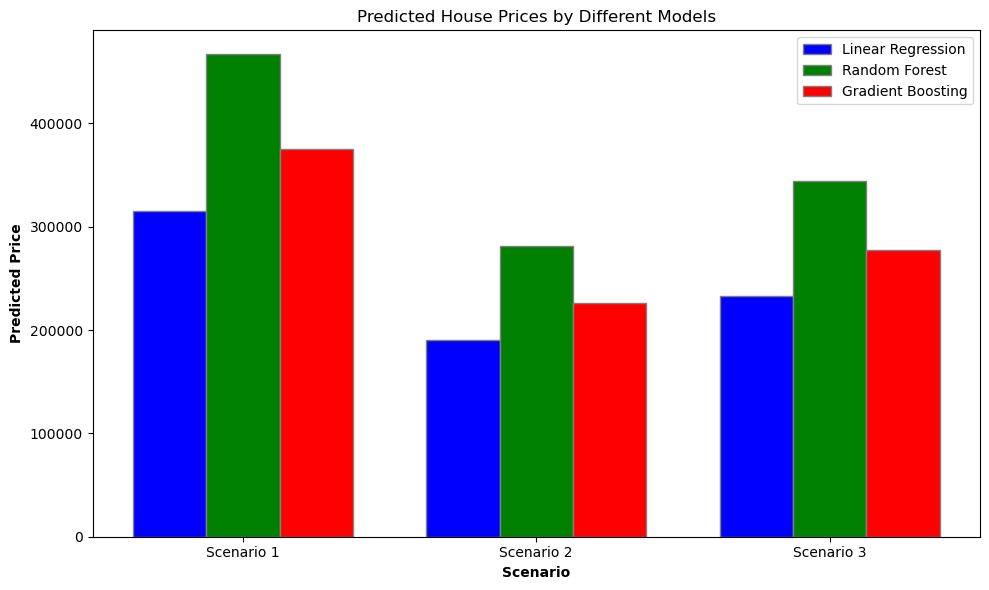

In [63]:
#Define the hypothetical scenarios and predicted prices
scenarios = ['Scenario 1', 'Scenario 2', 'Scenario 3']
predicted_prices_lr = [315200, 189950, 232650]
predicted_prices_rf = [466780, 280980, 343960]
predicted_prices_gb = [375740, 226315, 277105]

# Combine predictions into a DataFrame for easier plotting
predictions = pd.DataFrame({
    'Scenario': scenarios,
    'Linear Regression': predicted_prices_lr,
    'Random Forest': predicted_prices_rf,
    'Gradient Boosting': predicted_prices_gb
})

print(predictions)

# Plotting the predictions
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(predictions['Scenario']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar plots
plt.bar(r1, predictions['Linear Regression'], color='b', width=bar_width, edgecolor='grey', label='Linear Regression')
plt.bar(r2, predictions['Random Forest'], color='g', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r3, predictions['Gradient Boosting'], color='r', width=bar_width, edgecolor='grey', label='Gradient Boosting')

# Adding labels, title, and legend
plt.xlabel('Scenario', fontweight='bold')
plt.ylabel('Predicted Price', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(predictions['Scenario']))], predictions['Scenario'])
plt.title('Predicted House Prices by Different Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
